# GhPython Component Runtime Benchmark

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tests = ["One-to-One Function: rg.Circle (Flattened Input)",
         "One-to-One Function: rg.Circle",
         "Many-to-One Function: rg.Polyline",
         "One-to-Many Function: rs.DivideCurve"]
label = ["GH Component", "item loop", "tree loop", "tree loop parallel", "TreeHandler"]
n = [(n+1)**2 for n in (50, 100, 200, 300, 400, 500)]
n_ = [n**2 for n in (50, 100, 200, 300, 400, 500)]

In [3]:
runtime_matrix = {"unit": "ms", "shape": ("test", "input_n", "components")}
data = [
        [[0.022, 0.063, 0.023, 0.020, 0.024],
         [0.088, 0.246, 0.094, 0.076, 0.083],
         [0.409, 1.100, 0.374, 0.363, 0.387],
         [0.743, 2.300, 0.809, 0.704, 0.703],
         [1.300, 4.000, 1.500, 1.500, 1.300],
         [2.000, 6.300, 2.400, 1.900, 2.200]],

        [[0.021, 0.043, 0.022, 0.030, 0.025],
         [0.084, 0.170, 0.091, 0.105, 0.080],
         [0.341, 0.675, 0.377, 0.351, 0.306],
         [0.866, 1.500, 0.805, 0.789, 0.669],
         [1.400, 2.800, 1.400, 1.300, 1.300],
         [2.100, 4.400, 2.200, 2.100, 1.800]],

        [[0.032,  0.071, 0.036, 0.034, 0.060],
         [0.135,  0.326, 0.205, 0.164, 0.214],
         [0.611,  1.200, 0.721, 0.772, 0.898],
         [1.400,  3.200, 1.700, 2.300, 2.200],
         [2.400,  6.500, 3.800, 3.300, 3.900],
         [4.200, 12.000, 5.700, 6.000, 7.900]],

        [[  0.099,  0.190,  0.142, 0.118,   0.137],
         [  0.550,  0.827,  0.804, 0.436,   0.667],
         [  4.800,  3.400,  2.600, 1.700,   2.400],
         [ 20.600,  8.800,  6.600, 4.200,   5.400],
         [ 66.000, 18.300, 12.300, 8.000,   9.800],
         [198.000, 27.300, 17.600, 14.600, 17.900]]
]
data = np.asarray(data)

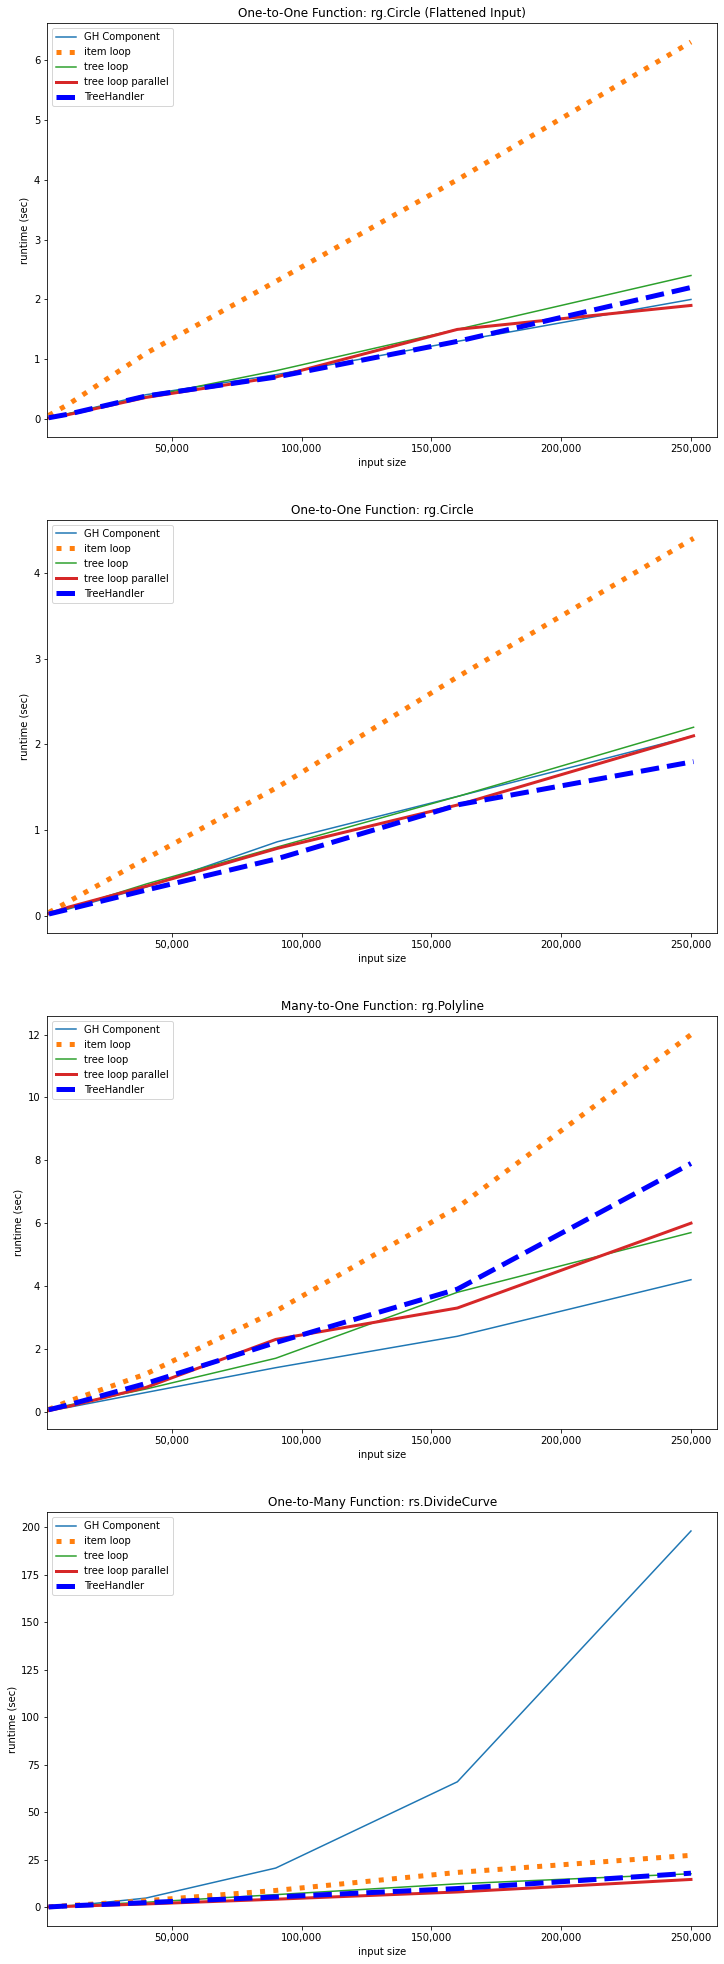

In [9]:
fig, axs = plt.subplots(4, figsize=(12, 35))

for i in range(len(tests)):
    input = n if i == 1 else n_
    axs[i].plot(input, data[i, :, 0], label=label[0])
    axs[i].plot(input, data[i, :, 1], linestyle="dotted", linewidth=5, label=label[1])
    axs[i].plot(input, data[i, :, 2], label=label[2])
    axs[i].plot(input, data[i, :, 3], linewidth=3, label=label[3])
    axs[i].plot(input, data[i, :, 4], color="blue", linestyle="dashed", linewidth=5, label=label[4])
    axs[i].legend()

for ax, test in zip(axs.flat, tests):
    ax.set(xlabel="input size", ylabel="runtime (sec)")
    ax.set(xlim=[2000, 260000])
    ax.set(title=test)
    ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
plt.show()